In [1]:
#http://michaelpaulschramm.com/simple-time-series-trend-analysis/

               site_no  parameter_cd  mean_va
1924-03-31  14064500.0          60.0   1367.0
1924-04-30  14064500.0          60.0   1407.0
1924-05-31  14064500.0          60.0   1274.0
1924-06-30  14064500.0          60.0   1367.0
1924-07-31  14064500.0          60.0   1239.0


/Users/david/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
/Users/david/anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


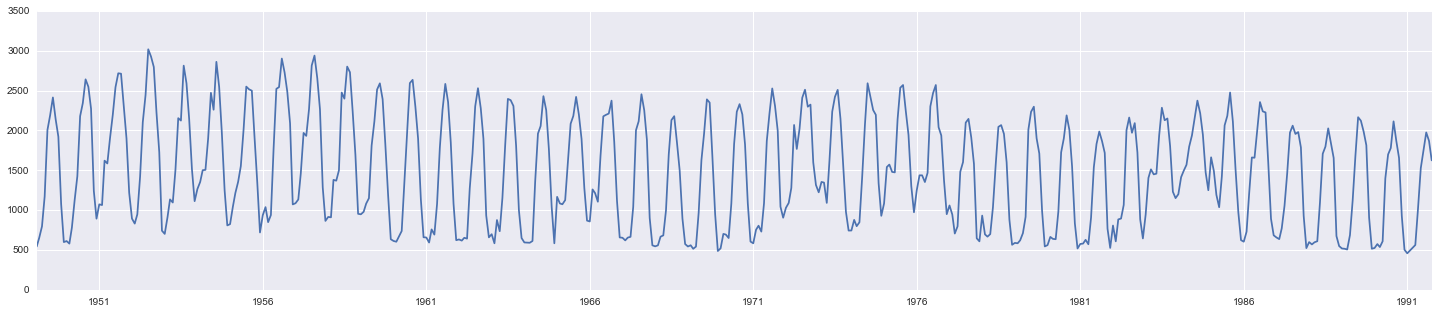

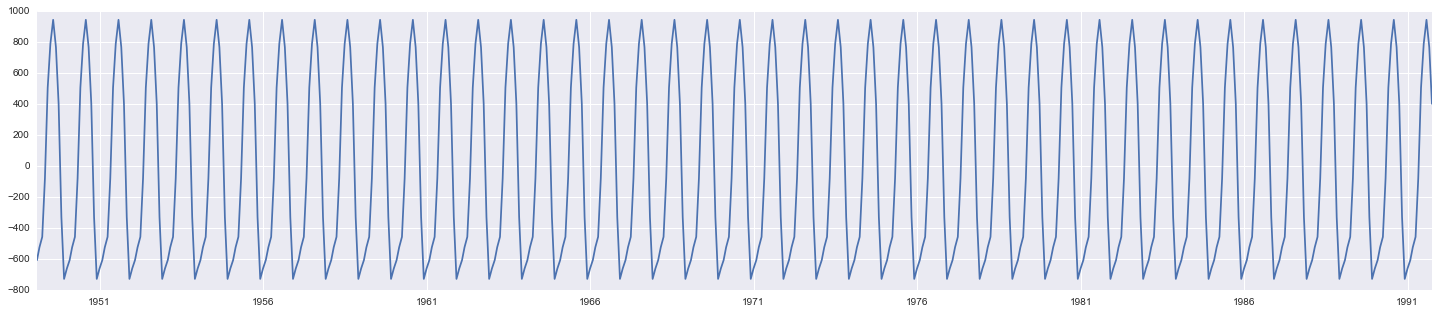

In [15]:
%matplotlib inline
import urllib 
import datetime as datetime  
import pandas as pd  
import statsmodels.api as sm  
import seaborn as sns  
import matplotlib.pyplot as plt
import utils as ut

# Import the sample streamflow dataset
data = urllib.request.urlopen('https://raw.github.com/mps9506/Sample-Datasets/master/Streamflow/USGS-Monthly_Streamflow_Bend_OR.tsv')  
df = pd.read_csv(data, sep='\t')

# The yyyy,mm, and dd are in seperate columns, we need to make this a single column
df['dti'] = df[['year_nu','month_nu','dd_nu']].apply(lambda x: datetime.datetime(*x),axis=1)

# Let use this as our index since we are using pandas
df.index = pd.DatetimeIndex(df['dti'])  
# Clean the dataframe a bit
df = df.drop(['dd_nu','year_nu','month_nu','dti'],axis=1)  
df = df.resample('M',how='mean')  
print (df.head())  
#fig,ax = plt.subplots(1,1, figsize=(6,4))  
flow = df['mean_va']  
flow = flow['1949-01':]
ut.figurefullwidth()
plt.plot(flow)
plt.figure()
ut.figurefullwidth()
res = sm.tsa.seasonal_decompose(flow)  
plt.plot(res.seasonal)
#res.plot()
#plt.plot(res)
#plt.show()
#fig = res.plot()
#fig.show()  

fa=12.0000Hz (Frequency)


/Users/david/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


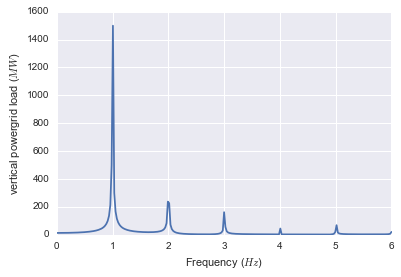

In [59]:
#hann = np.hanning(len(res.seasonal.values))

#Y = np.fft.fft(hann*res.seasonal.values)
Y = np.fft.fft(res.seasonal.values)

N = len(Y)/2+1
fa = 12.0 # every 15 minutes
print('fa=%.4fHz (Frequency)' % fa)

X = np.linspace(0, fa/2, N, endpoint=True)

plt.plot(X, 2.0*np.abs(Y[:N])/N)
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('vertical powergrid load ($MW$)')

/Users/david/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


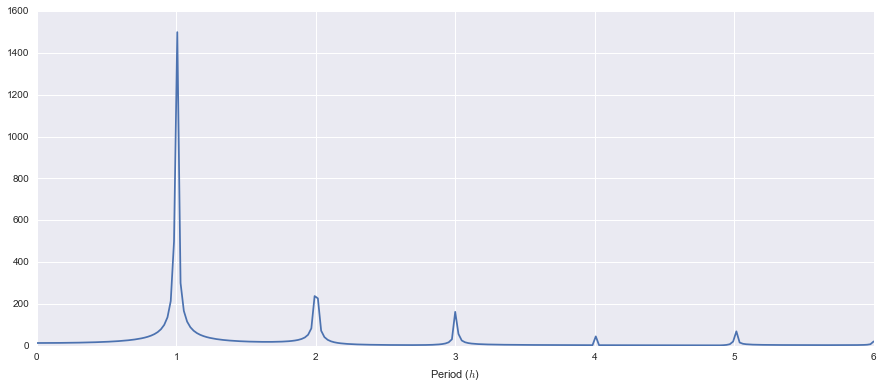

In [60]:
#Xp = 1.0/X # in seconds
Xph= X

plt.figure(figsize=(15,6))
plt.plot(Xph, 2.0*np.abs(Y[:N])/N)
#plt.xticks([12, 24, 33, 84, 168])
#plt.xlim(0, 180)
#plt.ylim(0, 1500)
plt.xlabel('Period ($h$)')
plt.savefig('VerticalGridLoadGermany2013-FFT.png',bbox_inches='tight', dpi=150, transparent=True)

In [3]:
import numpy as np  
from scipy.stats import norm, mstats


def mk_test(x, alpha = 0.05):  
    """   
    Input:
        x:   a vector of data
        alpha: significance level (0.05 default)

    Output:
        trend: tells the trend (increasing, decreasing or no trend)
        h: True (if trend is present) or False (if trend is absence)
        p: p value of the significance test
        z: normalized test statistics 

    Examples
    --------
      >>> x = np.random.rand(100)
      >>> trend,h,p,z = mk_test(x,0.05) 
    """
    n = len(x)

    # calculate S 
    s = 0
    for k in range(n-1):
        for j in range(k+1,n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x = np.unique(x)
    g = len(unique_x)

    # calculate the var(s)
    if n == g: # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else: # there are some ties in data
        tp = np.zeros(unique_x.shape)
        for i in range(len(unique_x)):
            tp[i] = sum(unique_x[i] == x)
        var_s = (n*(n-1)*(2*n+5) + np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s>0:
        z = (s - 1)/np.sqrt(var_s)
    elif s == 0:
            z = 0
    elif s<0:
        z = (s + 1)/np.sqrt(var_s)

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z))) # two tail test
    h = abs(z) > norm.ppf(1-alpha/2) 

    if (z<0) and h:
        trend = 'decreasing'
    elif (z>0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z

In [5]:
trend = res.trend['1950':'1960']  
test_trend,h,p,z = mk_test(trend,alpha=0.05)  
print (test_trend, h)  
print (z, p  )

decreasing True
-4.05429635464 5.02854346629e-05
